In [1]:
import numpy
from keras.datasets import imdb

from sequence_classifier_comparator import SequenceClassifierComparator
from neural_networks_classifier import NeuralNetworksClassifier
from knn_classifier import KNNClassifier
from svm_classifier import SVMClassifier
from hmm_classifier import HMMClassifier
from results_reader import ResultsReader
from results_writer import ResultsWriter
from helpers import datasets_helper

D:\Anaconda\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [7]:
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
# (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# (X_train, y_train), (X_test, y_test) = datasets_helper.get_sentiment_data(train_test_ratio = 0.5)
# (X_train, y_train), (X_test, y_test) = datasets_helper.get_troll_data(train_test_ratio = 0.5)


X = numpy.concatenate((X_train, X_test))
y = numpy.concatenate((y_train, y_test))

In [4]:
X = X[:1000]
y = y[:1000]

10000


In [3]:
comparator = SequenceClassifierComparator(ResultsWriter(), ResultsReader())

In [217]:
nn_classifier = NeuralNetworksClassifier(top_words=top_words)
comparator.add_classifier(nn_classifier)

In [4]:
svm_classifier = SVMClassifier()
svm_transformer = svm_classifier.get_transformer()
comparator.add_classifier(svm_classifier, sequence_transformer=svm_transformer)

In [ ]:
knn_classifier = KNNClassifier(n_neighbors=1)
comparator.add_classifier(knn_classifier)

In [8]:
comparator.fit_predict(X, y, rounds=2)

SVM, round 1, with 3-fold cross validation
SVM, round 2, with 3-fold cross validation


--------------
SVM
{}


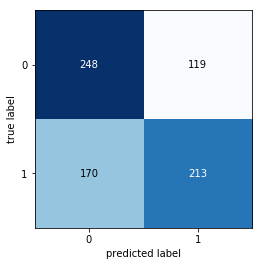

--------------
SVM
{}


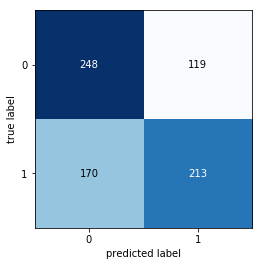

--------------
SVM
{}


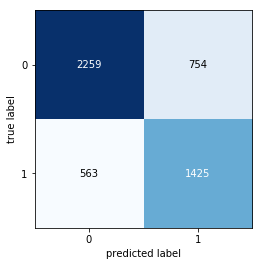

--------------
SVM
{}


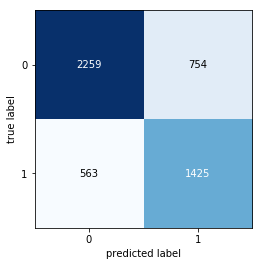

In [9]:
presenter = comparator.get_presenter()
presenter.show_all()